# Assignment 1. Handwritten digit recognition with K-means


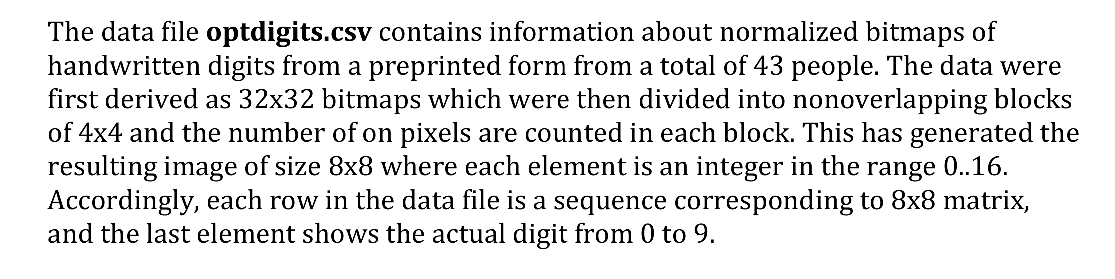

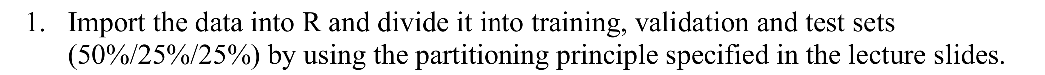

In [1]:
digits <- read.csv("optdigits.csv", header = F)
colnames(digits)[ncol(digits)] <- "number"
digits$number <- as.factor(digits$number)
n <- dim(digits)[1] 
set.seed(12345)
id <- sample(1:n, floor(n*0.5)) 
train <- digits[id,]
id1 <- setdiff(1:n, id) 
set.seed(12345) 
id2 <- sample(id1, floor(n*0.25)) 
validation <- digits[id2,]
id3 <- setdiff(id1,id2) 
test <- digits[id3,]

In [2]:
head(digits)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V56,V57,V58,V59,V60,V61,V62,V63,V64,number
0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
0,0,11,16,10,1,0,0,0,4,...,3,0,0,10,16,16,16,16,6,2


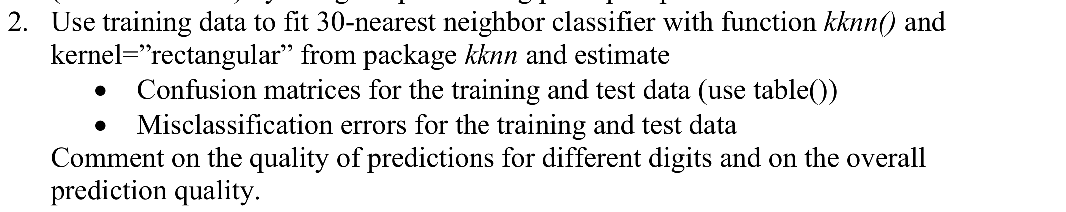

In [3]:

#install.packages('kknn')
library(kknn)

In [4]:
knn_train <- kknn(number ~., train, train, k = 30, kernel = "rectangular")
knn_test <- kknn(number ~., train, test, k = 30, kernel = "rectangular")
pred_train<- fitted(knn_train)
confusion_train <- table(train$number, pred_train)
pred_test <- fitted(knn_test)
confusion_test <- table(test$number, pred_test)

# Confusion Matrix

In [5]:
print(confusion_train)


   pred_train
      0   1   2   3   4   5   6   7   8   9
  0 202   0   0   0   0   0   0   0   0   0
  1   0 179  11   0   0   0   0   1   1   3
  2   0   1 190   0   0   0   0   1   0   0
  3   0   0   0 185   0   1   0   1   0   1
  4   1   3   0   0 159   0   0   7   1   4
  5   0   0   0   1   0 171   0   1   0   8
  6   0   2   0   0   0   0 190   0   0   0
  7   0   3   0   0   0   0   0 178   1   0
  8   0  10   0   2   0   0   2   0 188   2
  9   1   3   0   5   2   0   0   3   3 183


In [6]:
print(confusion_test)


   pred_test
      0   1   2   3   4   5   6   7   8   9
  0  77   0   0   0   1   0   0   0   0   0
  1   0  81   2   0   0   0   0   0   0   3
  2   0   0  98   0   0   0   0   0   3   0
  3   0   0   0 107   0   2   0   0   1   1
  4   0   0   0   0  94   0   2   6   2   5
  5   0   1   1   0   0  93   2   1   0   5
  6   0   0   0   0   0   0  90   0   0   0
  7   0   0   0   1   0   0   0 111   0   0
  8   0   7   0   1   0   0   0   0  70   0
  9   0   1   1   1   0   0   0   1   0  85


With these two matrix, we can simply have the accuracy rate based on correct numbers over total numbers for each digits:

In [7]:
print(diag(confusion_train)/rowSums(confusion_train))
print(diag(confusion_test)/rowSums(confusion_test))

        0         1         2         3         4         5         6         7 
1.0000000 0.9179487 0.9895833 0.9840426 0.9085714 0.9447514 0.9895833 0.9780220 
        8         9 
0.9215686 0.9150000 
        0         1         2         3         4         5         6         7 
0.9871795 0.9418605 0.9702970 0.9639640 0.8623853 0.9029126 1.0000000 0.9910714 
        8         9 
0.8974359 0.9550562 


For train data, the quality of predicting different digits is with a large range between 91% and 100%. The prediction for digit 0 is 100%, and following with 6, 2, 3 and 7 with 97% to 99% rate. While the lower ones are for digits 4, 9 and 1 with about 91% correct rate. This could indicate that even for train data itself, the model does not fit quite well.

For test data, the accuracy rates for prediction on digits do not have a huge difference than for train data. Some of them are higher than the train data prediction rate such as for 1, 6, 7 and 9. The highest one is 100% for digit 6. And other ones are below the train ones with a lowest rate for digit 4 being 86%. As we can see here, the rates for digits comparing with them for train data do not have an obvious decreasing trending, which means the model generalizes well.


# mis-classification error

In [8]:
missclass <- function(X,X1) { 
  n = length(X)
  return(1-sum(diag(table(X,X1)))/n)
}
mismatch_rate_train <- missclass(train$number, pred_train)
mismatch_rate_test <- missclass(test$number, pred_test)
cat("The mismatch rate for train data is:", mismatch_rate_train, 
    "\nThe mismatch rate for test data is:", mismatch_rate_test)

The mismatch rate for train data is: 0.04500262 
The mismatch rate for test data is: 0.05329154


For the overall mismatch rate 0.045 for train data and 0.053 for test data, we can see that the rates for both of them are not low enough and the difference between them is not high, this can mean that the model is a little under fitting.

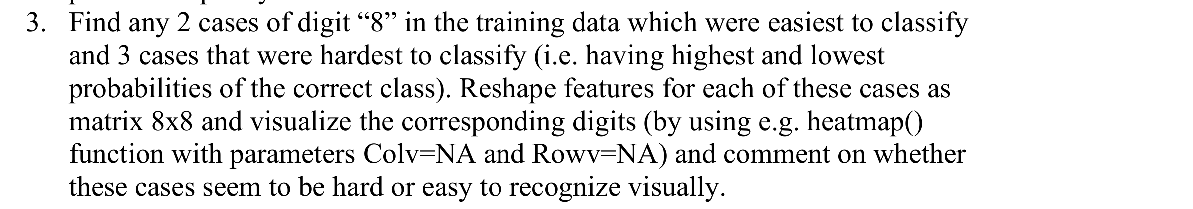

In [9]:
train_eight <- train[which(train$number==8),]
train_eight$prob <- knn_train$prob[which(train$number==8), "8"]
sortedResult <- sort(train_eight[, "prob"], index.return = T)
#sortedResult$x[1:3] #0.1000000 0.1333333 0.1666667
hard_ids <- sortedResult$ix[1:3] #50  43 136
#tail(sortedResult$x, n=c(2)) #1 1
easy_ids <- tail(sortedResult$ix, n=c(2)) #179 183
plotHeatmap <- function(index){
  heatmap(matrix(as.numeric(train_eight[index, 1:64]), 8, 8, byrow = T), Colv = NA, Rowv = NA)
}

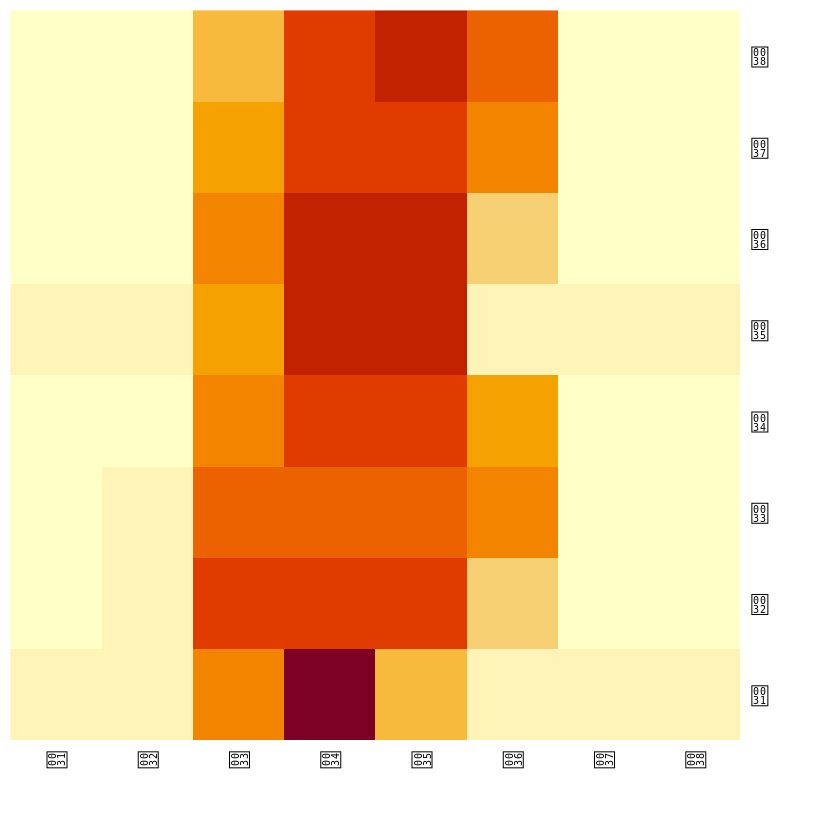

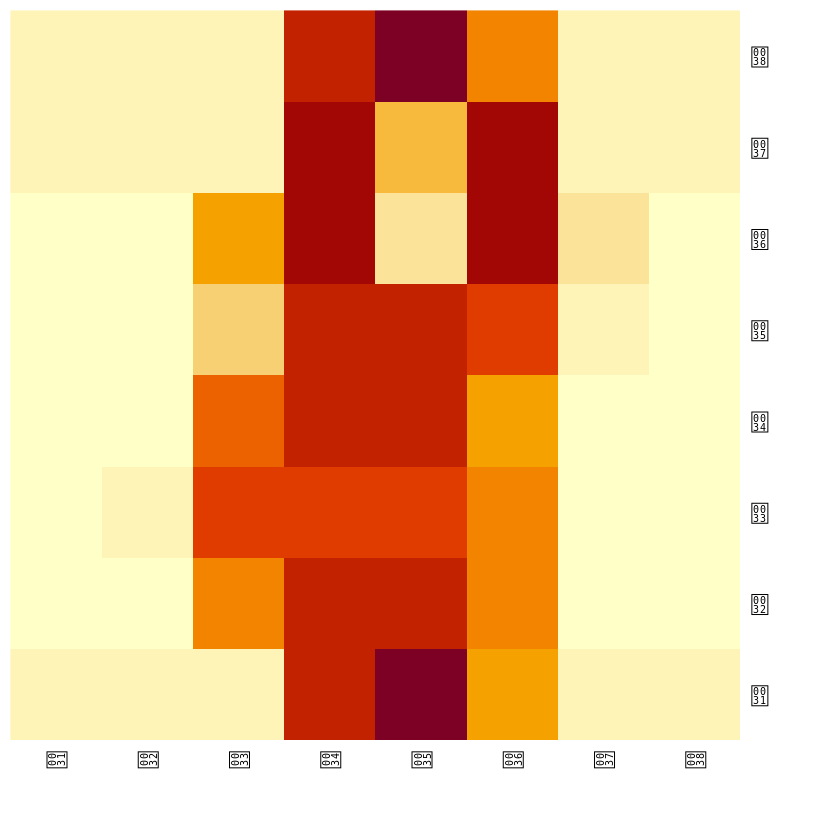

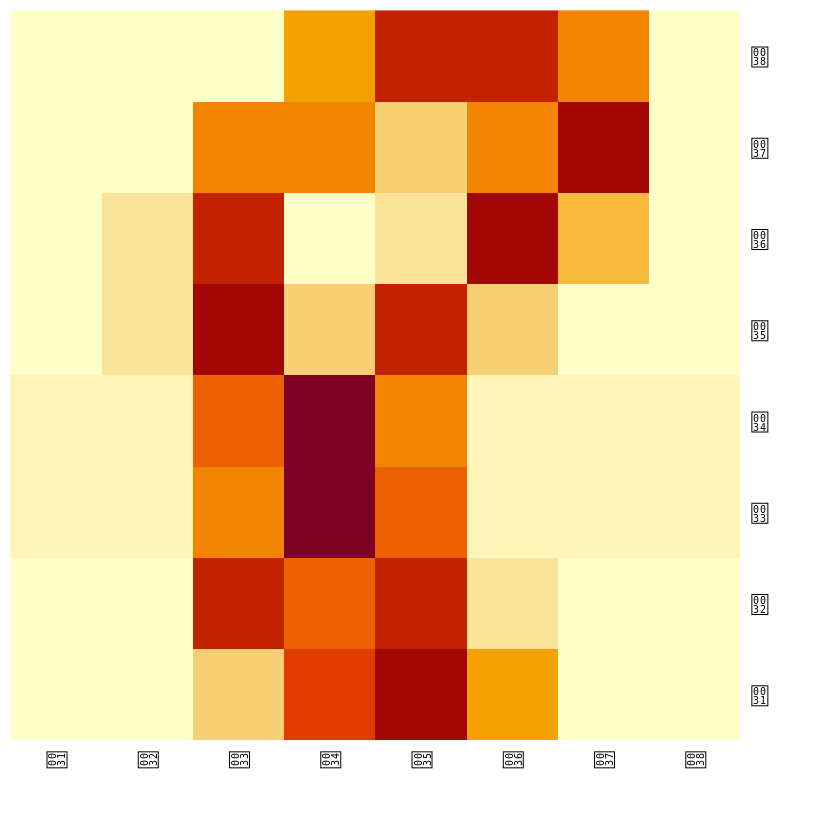

In [10]:
 for (i in c(hard_ids)) {
   plotHeatmap(i)
 }

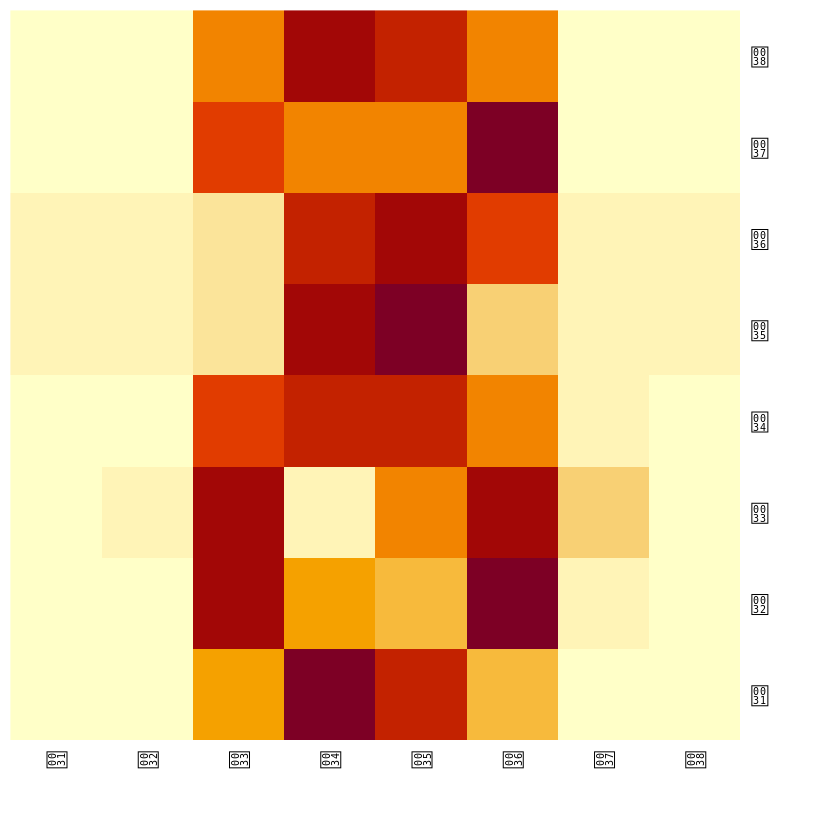

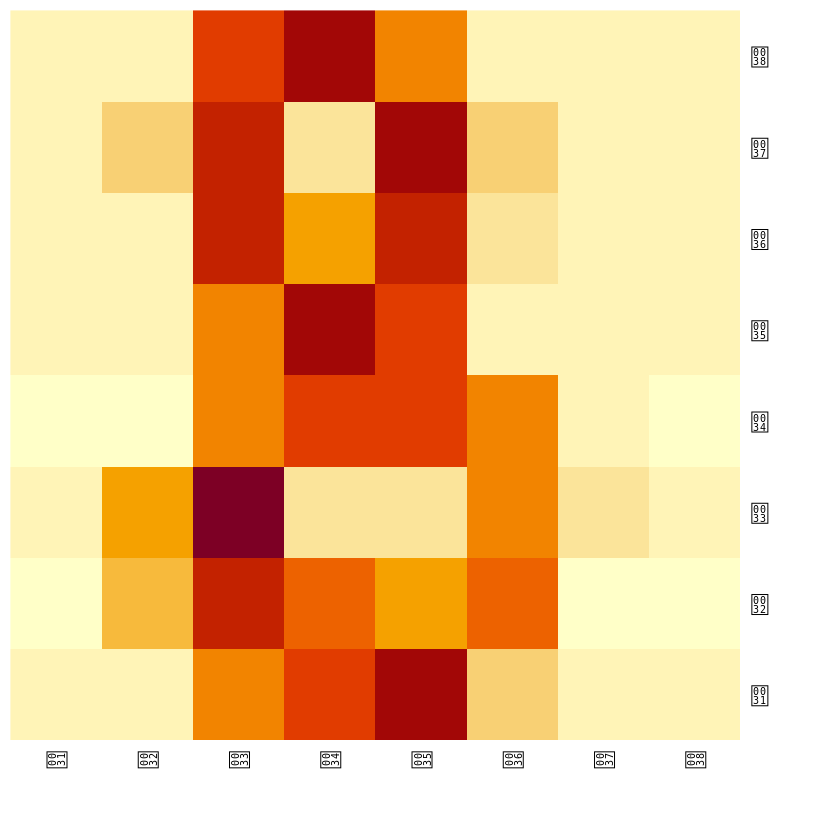

In [12]:
for (i in c( easy_ids)) {
  plotHeatmap(i)
}

### 1.4 Use different knn models to fit the train data and analyze with miss-classification rate

This is about fitting the train data with K=1..30 knn models and plot the mis-classification rates for train and validation data. Then observe the plot in different perspective. The code shows as following:

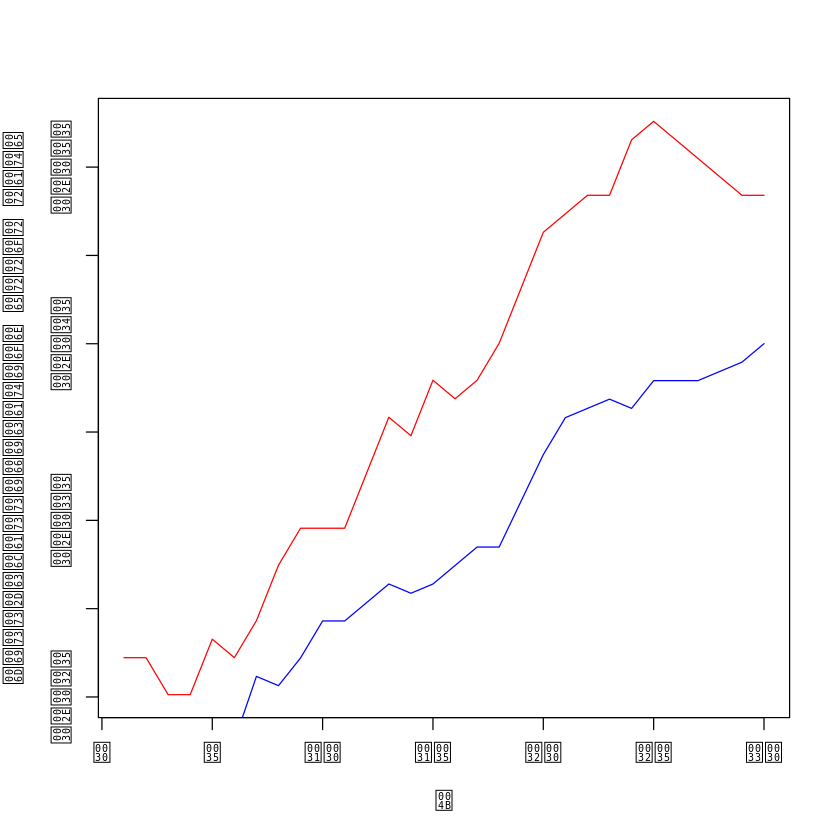

In [13]:
e_t <- 0
e_v <- 0
for (k in 1:30) {
  kt <- kknn(number ~., train, train, k = k, kernel = "rectangular")
  e_t[k] <- missclass(train$number, kt$fitted.values)
  kv <- kknn(number ~., train, validation, k = k, kernel = "rectangular")
  e_v[k] <- missclass(validation$number, kv$fitted.values)
}
plot(1:30, e_v, type = "l", col = "red", xlab = "K", ylab = "miss-classification error rate")
lines(1:30, e_t, col = "blue")
#legend(2, 0.06, legend=c("validation", "train"),
      # col=c("red", "blue"), lty=1:1, cex=0.8)

As k increases, the complexity of the model for both data sets also increases overall. As we can see in the plot, the error rate for the validation data decreases first to 0.025 when K is 3 and then goes up quickly as K increases with a final slight drop till 0.05. While the error rate for the train data starts with 0 when k is 0, and then goes up gradually as K goes up.

The optimal K is a little difficult to detect right away since the differences for different K values are very small, especially when K is about 3 to 7. But I would say maybe 3 is the optimal one based on only the rate we plot here. As at that point, the value for validation rate is the lowest and for train data is also relatively low.

From the perspective of bias-variance trade-off, low bias is not always perfect as it can lead to a higher variance(when error of train data is 0, the error of validation data is not the lowest). When bias is a little bit higher, the variance can be a bit lower as it can generalize new data better. But after certain point, when bias gets too high, the error rate for both train and validation data will be high. In this case, it would be not a suitable model as it may be under-fitting.

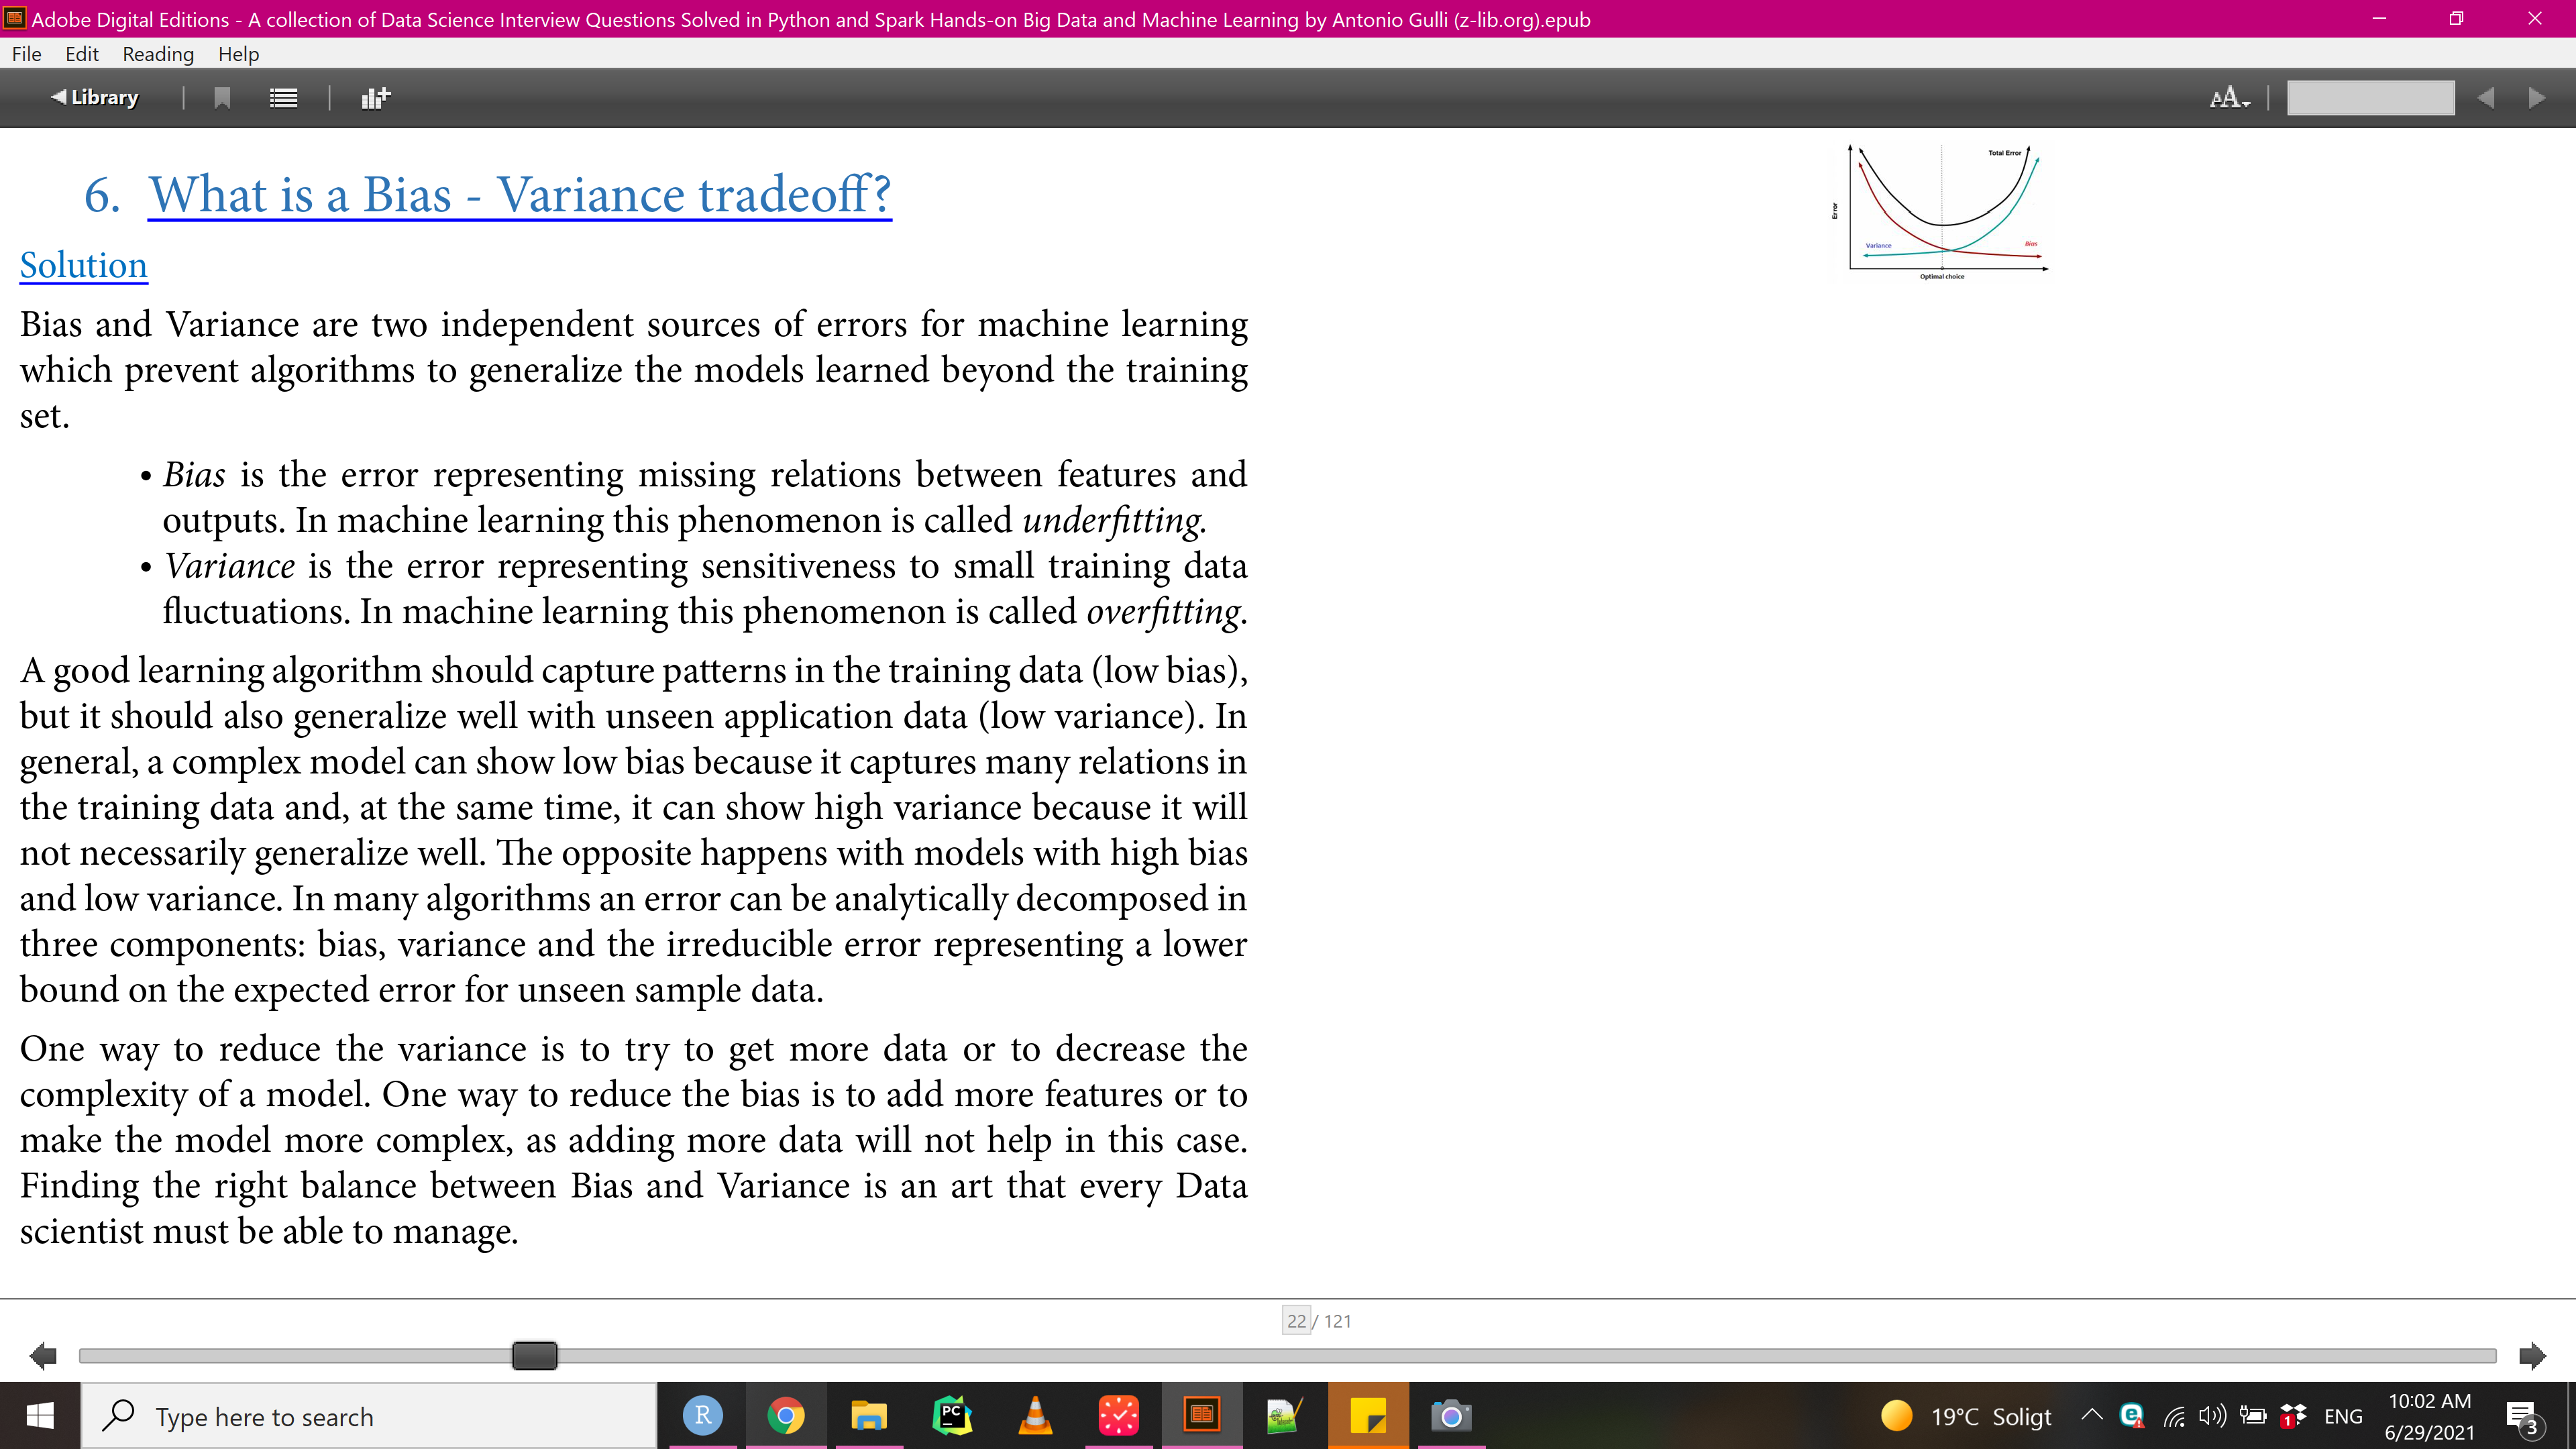

With the optimal K value selected based on above analysis, the model for test data can be shown with following code:

In [21]:
k_test_optik <- kknn(number ~., train, test, k = 3, kernel = "rectangular")
cat("Test mis-classification rate when k=3 is:", missclass(test$number, fitted(k_test_optik)))
cat("Train mis-classification rate when k=3 is:", e_t[3])
cat("Validation mis-classification rate when k=3 is:", e_v[3])

Test mis-classification rate when k=3 is: 0.02403344Train mis-classification rate when k=3 is: 0.0115123Validation mis-classification rate when k=3 is: 0.02513089

In [28]:
max(e_v)

[1] 0.05759162

The test error being 2.40% with K=3 is about the same as the error rate of validation data and a little higher (about 1.25%) higher than train data. I would say the quality of the model with K=3 is acceptable because with a similar relatively high fitting rate to both validation and test data(not overfitting) and well fitted for train data(not underfitting).


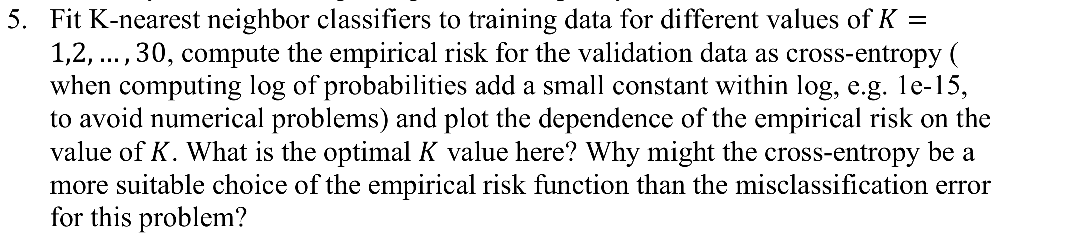

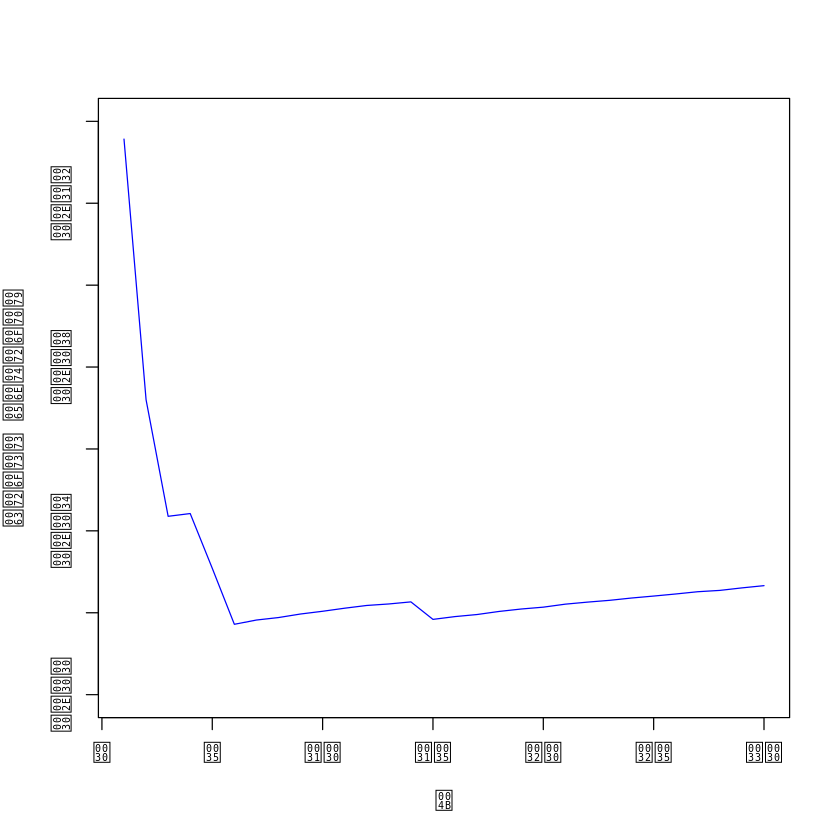

In [14]:
r_v <- 0
for (k in 1:30) {
  kv <- kknn(number ~., train, validation, k = k, kernel = "rectangular")
  s <- 0
  for (i in 0:9) {
    s <- s + sum(log2(kv$prob[which(validation$number==i), toString(i)] + 1e-15)/nrow(kv$prob))
  }
  r_v[k] <- -s/10
}
plot(1:30, r_v, ylim = c(0,0.14), type = "l", xlab = "K", ylab = "cross entropy",col='blue')


The optimized K value is 6, because at that point, the risk value is the lowest with a value being 0.0172. The reason cross entropy is a better approach of estimating optimal model here is because it uses the probabilities of each class for every observation. While the mis-classification rate only count the final result class of each observation. Thus, cross-entropy can detect which model is better even though their mis-classification rates are the same.

for a single miss-classification cross entropy penelizes model way higher than MSE

In [15]:
which.min(r_v)

[1] 6